In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 
%matplotlib inline

/Users/mdodici/opt/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/mdodici/opt/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
data = pd.read_csv('sbdb_query_results.csv')
#for col in data.columns:
#    print(col)
print(data.shape)

(4209, 35)


In [3]:
def mmr(i,j):
    """
    In: i, j -- integers
    Out: sma -- semimajor axis at which an object would be in an i:j mmr with neptune
    """
    per = 164.79*i/j
    sma = per**(2/3)
    return sma

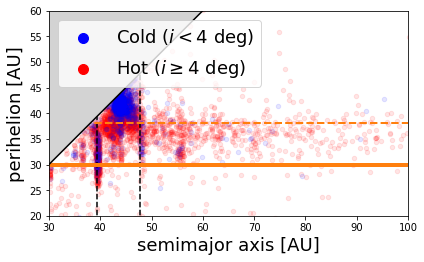

In [4]:
fig,ax = plt.subplots(figsize=(6,4.5))

cut = 1
hst = 0

if hst == True:
    h = ax.hist2d(data['a'],data['a']*(1-data['e']),range=((30,100),(10,80)),
                  norm=mpl.colors.LogNorm(),bins=50,cmap='YlGn')
    #ax.set_title('log (count) for each bin',fontsize=18)
    cbar = fig.colorbar(h[3],ax=ax)
    
elif cut == False:
    a = ax.scatter(data['a'], data['a']*(1-data['e']),
                c=data['i'],
                vmax=30,
                cmap='inferno',
                marker='o',
                alpha=.8,
                s=20)
    if hst == False:
        cbar = fig.colorbar(a, ax=ax)
        cbar.set_label('inclination [deg]', size=18)
elif cut == True:
    ax.scatter(data.loc[data['i']<4, 'a'], data.loc[data['i']<4, 'a']*(1-data.loc[data['i']<4, 'e']), 
               c='b',alpha=.1,s=20,zorder=1)
    ax.scatter(data.loc[data['i']>4, 'a'], data.loc[data['i']>4, 'a']*(1-data.loc[data['i']>4, 'e']), 
               c='r',alpha=.1,s=20,zorder=.9)
    lgnd = ax.legend([r"Cold ($i < 4$ deg)",r"Hot ($i\geq 4$ deg)"],fontsize=18,loc='upper left')
    for handle in lgnd.legendHandles:
        handle.set_sizes([100])
        handle.set_alpha(1)
    
#for i in (np.array(range(9))+1)/10:
#    ax.plot(np.linspace(0,2000),np.linspace(0,2000)*i,lw='2',ls=':',c='lightgrey',zorder=0)

# cut off restricted zone where q > a
ax.fill_between([0,2000],[0,2000],[2000,2000],facecolor='lightgrey',zorder=2)
plt.plot(np.linspace(0,2000),np.linspace(0,2000),c='k',ls='-')  

#ax.plot(np.linspace(47.4,2000),np.linspace(47.4,2000)*.76,c='grey',ls='--',lw=2,zorder=1.8)  # upper limit of detached
ax.hlines([29.973, 38],0,100,color='C1',ls=['-','--'],lw=[4,2],zorder=1.9)   # neptune + scatter border
ax.vlines([mmr(2,1),mmr(3,2)],0,100,color='k',ls='--',zorder=1.8)            # mean motion resonances



ax.set_ylabel('perihelion [AU]',fontsize=18)
ax.set_xlabel('semimajor axis [AU]',fontsize=18)


ax.set_xlim(30,100)
ax.set_ylim(20,60)
ax.set_aspect('equal')

fig.tight_layout()
fig.savefig('TNOs_q_vs_a.png',dpi=300)

**Scattering** -- between orange dashed line (38 AU) and thick orange line (Neptune orbit). **Detached** -- between grey and orange dashed lines. **3:2 and 2:1 mmrs** noted in black dashed lines. Light grey dotted lines show **equal eccentricity** at different semimajor axes.

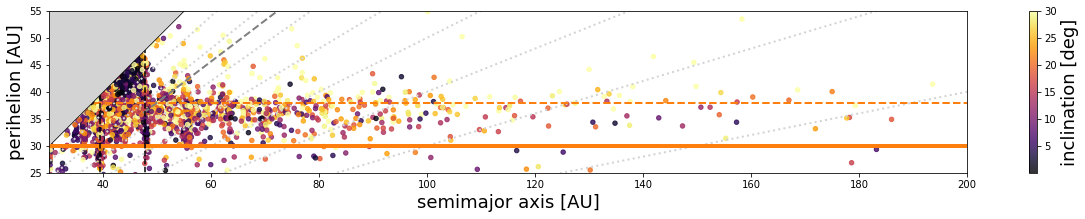

In [8]:
fig,ax = plt.subplots(figsize=(18,3))

cut = 0
hst = 0

if hst == True:
    ax.hist2d(data['a'],data['a']*(1-data['e']),range=((30,200),(25,55)),
              norm=mpl.colors.LogNorm(),bins=(240,40),cmap='YlGn')
elif cut == False:
    a = ax.scatter(data['a'], data['a']*(1-data['e']),
                c=data['i'],
                vmax=30,
                cmap='inferno',
                marker='o',
                alpha=.8,
                s=20)
    if hst == False:
        cbar = fig.colorbar(a, ax=ax)
        cbar.set_label('inclination [deg]', size=18)
elif cut == True:
    ax.scatter(data.loc[data['i']<4, 'a'], data.loc[data['i']<4, 'a']*(1-data.loc[data['i']<4, 'e']), 
               c='b',alpha=.2,s=20,zorder=1)
    ax.scatter(data.loc[data['i']>4, 'a'], data.loc[data['i']>4, 'a']*(1-data.loc[data['i']>4, 'e']), 
               c='r',alpha=.2,s=20,zorder=.9)
    lgnd = ax.legend([r"Cold ($i < 4$ deg)",r"Hot ($i\geq 4$ deg)"],fontsize=18,loc='upper right')
    for handle in lgnd.legendHandles:
        handle.set_sizes([100])
        handle.set_alpha(1)
        
for i in (np.array(range(9))+1)/10:
    ax.plot(np.linspace(0,2000),np.linspace(0,2000)*i,lw='2',ls=':',c='lightgrey')
    
ax.plot(np.linspace(47.4,2000),np.linspace(47.4,2000)*.76,c='grey',ls='--',lw=2)
plt.plot(np.linspace(0,2000),np.linspace(0,2000),c='k',ls='-')

ax.hlines([29.973, 38],0,2000,color='C1',ls=['-','--'],lw=[4,2])
ax.vlines([mmr(2,1),mmr(3,2)],0,100,color='k',ls='--')

ax.set_ylabel('perihelion [AU]',fontsize=18)
ax.set_xlabel('semimajor axis [AU]',fontsize=18)

#ax.fill_between([0,2000], [30,30],    [38,38],facecolor='C1',alpha=.2,zorder=0)
ax.fill_between([0,2000],[0,2000],[2000,2000],facecolor='lightgrey',zorder=2)

ax.set_xlim(30,200)
ax.set_ylim(25,55)
ax.set_aspect('equal')

fig.tight_layout()

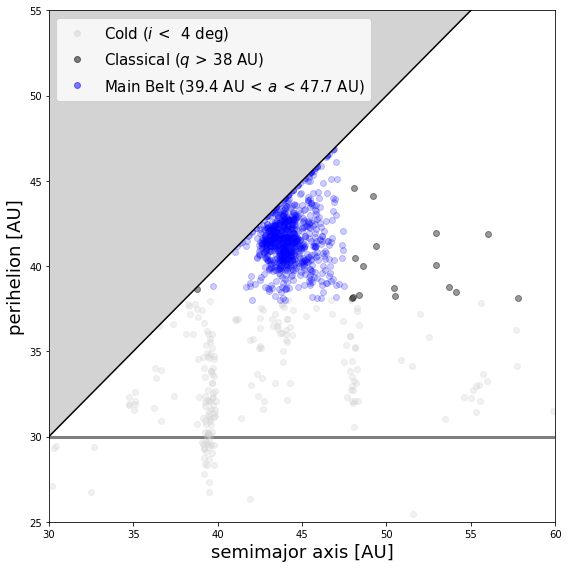

In [13]:
qcut = 38
icut = 4
acut = (39.4, 47.7)

cold = data[data.i < icut]  # dynamically cold
csct = cold[cold.a*(1-cold.e) < qcut]  # cold, scattering
ccls = cold[cold.a*(1-cold.e) > qcut]  # cold, classical
cckb = ccls[(ccls.a > acut[0]) & (ccls.a < acut[1])]  # cold classical main belt
ccob = ccls[(ccls.a < acut[0]) | (ccls.a > acut[1])]  # cold classical outside of main belt

#################################################
####  no cuts made to account for resonances ####
#################################################

hot_ = data[data.i > icut]  # dynamically hot

fig, ax = plt.subplots(figsize=(8,8))

plt.plot(csct['a'], csct['a']*(1-csct['e']),ls='',marker='o',c='lightgrey',alpha=.3)
plt.plot(ccob['a'], ccob['a']*(1-ccob['e']),ls='',marker='o',c='k',alpha=.4)
plt.plot(cckb['a'], cckb['a']*(1-cckb['e']),ls='',marker='o',c='b',alpha=.2)

lgnd = ax.legend([r'Cold ($i\,<\,$%2.f deg)' %icut, 
                  r'Classical ($q\,>\,$%2.f AU)' %qcut, 
                  r'Main Belt (%2.1f AU$\,<\,a\,<\,$%2.1f AU)' %acut],
                fontsize=15)
for handle in lgnd.legendHandles:
    handle.set_alpha(.5)

plt.fill_between([0,2000],[0,2000],[2000,2000],facecolor='lightgrey',zorder=2)
plt.plot(np.linspace(0,2000),np.linspace(0,2000),c='k',ls='-')
ax.hlines([29.973],0,100,color='k',ls=['-'],lw=[3],alpha=.5,zorder=0)


plt.xlim(30,60)
plt.ylim(25,55)

ax.set_ylabel('perihelion [AU]',fontsize=18)
ax.set_xlabel('semimajor axis [AU]',fontsize=18)

fig.tight_layout()

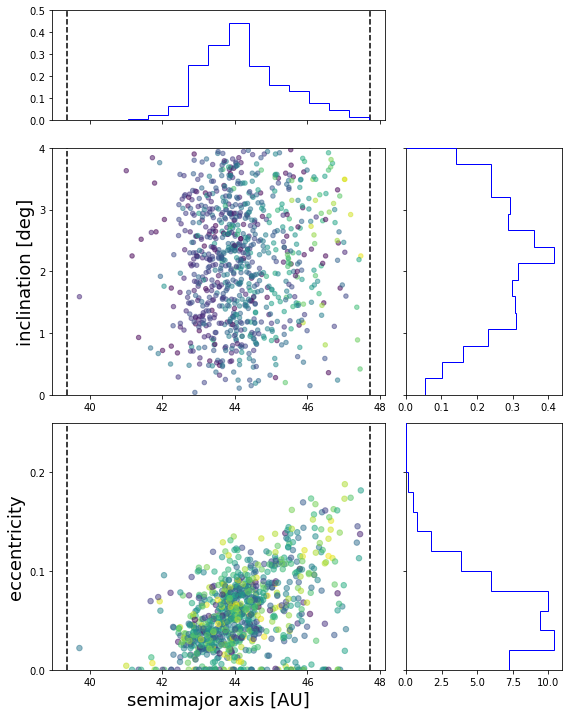

In [14]:
fig = plt.figure(figsize=(8,10))
gs = GridSpec(5,3)

# adding sma vs inc scatter plot

axsci = fig.add_subplot(gs[1:3,0:2])

axsci.scatter(cckb['a'],cckb['i'],c=cckb['e'],marker='o',alpha=.5,s=20)
axsci.vlines([mmr(2,1),mmr(3,2)],0,1000,color='k',ls='--')

axsci.set_ylim(0,4)
axsci.set_ylabel('inclination [deg]',fontsize=18)
axsci.set_yticks([0,1,2,3,4])

# adding inclination histogram on side

axhyi = fig.add_subplot(gs[1:3,2], sharey=axsci)

axhyi.hist(cckb['i'],histtype='step',edgecolor='b',bins=15,range=(0,4),
           orientation='horizontal',density=True,zorder=4)

axhyi.set_ylim(0,4)
axhyi.tick_params(axis='y',labelleft=False)
axhyi.set_yticks([0,1,2,3,4])




# Adding sma vs ecc scatter plot

axsce = fig.add_subplot(gs[3:5,0:2])

axsce.scatter(cckb['a'],cckb['e'],c=cckb['i'],marker='o',alpha=.5,s=30)
axsce.vlines([mmr(2,1),mmr(3,2)],0,1,color='k',ls='--')

axsce.set_ylim(0,.25)
axsce.set_ylabel('eccentricity',fontsize=18)
axsce.set_xlabel('semimajor axis [AU]',fontsize=18)
axsce.set_yticks([0,.1,.2])

# adding eccentricity histogram on side

axhyi = fig.add_subplot(gs[3:5,2], sharey=axsce)

axhyi.hist(cckb['e'],histtype='step',edgecolor='b',bins=15,range=(0,.3),
           orientation='horizontal',density=True,zorder=4)

axhyi.set_ylim(0,.25)
axhyi.tick_params(axis='y',labelleft=False)
axhyi.set_yticks([0,.1,.2])




# adding sma histogram on top

axhx = fig.add_subplot(gs[0,0:2], sharex=axsci)

axhx.hist(cckb['a'],histtype='step',edgecolor='b',bins=15,range=(39.4,47.7),
          density=True,zorder=4)
axhx.vlines([mmr(2,1),mmr(3,2)],0,1000,color='k',ls='--')

axhx.set_ylim(0,.5)
axhx.tick_params(axis='x',labelbottom=False)

fig.tight_layout()

Color map on scatter relates to element not plotted (i.e. color is eccentricity on sma vs inc plot)

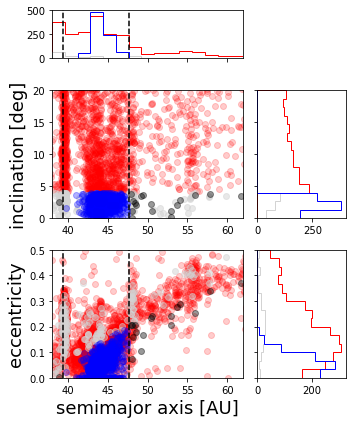

In [26]:
fig = plt.figure(figsize=(5,6))
gs = GridSpec(5,3)

# adding sma vs inc scatter plot

axsci = fig.add_subplot(gs[1:3,0:2])

axsci.plot(hot_['a'],hot_['i'],c='r',ls='',marker='o',alpha=.2)
axsci.plot(csct['a'],csct['i'],c='lightgrey',ls='',marker='o',alpha=.5)
axsci.plot(ccob['a'],ccob['i'],c='k',ls='',marker='o',alpha=.4)
axsci.plot(cckb['a'],cckb['i'],c='b',ls='',marker='o',alpha=.3)
axsci.vlines([mmr(2,1),mmr(3,2)],0,1000,color='k',ls='--')

axsci.set_ylim(0,20)
axsci.set_xlim(38,62)
axsci.set_ylabel('inclination [deg]',fontsize=18)

# adding inclination histogram on side

axhyi = fig.add_subplot(gs[1:3,2], sharey=axsci)

axhyi.hist(hot_['i'],histtype='step',edgecolor='r',bins=15,range=(0,20),
           orientation='horizontal',density=False)
axhyi.hist(csct['i'],histtype='step',edgecolor='lightgrey',bins=15,range=(0,20),
           orientation='horizontal',density=False)
axhyi.hist(cckb['i'],histtype='step',edgecolor='b',bins=15,range=(0,20),
           orientation='horizontal',density=False)

axhyi.set_ylim(0,20)
axhyi.set_yticks([0,5,10,15,20])
axhyi.tick_params(axis='y',labelleft=False)




# Adding sma vs ecc scatter plot

axsce = fig.add_subplot(gs[3:5,0:2])

axsce.plot(hot_['a'],hot_['e'],c='r',ls='',marker='o',alpha=.2)
axsce.plot(csct['a'],csct['e'],c='lightgrey',ls='',marker='o',alpha=.5)
axsce.plot(ccob['a'],ccob['e'],c='k',ls='',marker='o',alpha=.4)
axsce.plot(cckb['a'],cckb['e'],c='b',ls='',marker='o',alpha=.3)
axsce.vlines([mmr(2,1),mmr(3,2)],0,1000,color='k',ls='--')

axsce.set_xlim(38,62)
axsce.set_ylim(0,.5)
axsce.set_ylabel('eccentricity',fontsize=18)
axsce.set_xlabel('semimajor axis [AU]',fontsize=18)

# adding eccentricity histogram on side

axhye = fig.add_subplot(gs[3:5,2], sharey=axsce)

axhye.hist(hot_['e'],histtype='step',edgecolor='r',bins=15,range=(0,.5),
           orientation='horizontal',density=False)
axhye.hist(csct['e'],histtype='step',edgecolor='lightgrey',bins=15,range=(0,.5),
           orientation='horizontal',density=False)
axhye.hist(cckb['e'],histtype='step',edgecolor='b',bins=15,range=(0,.5),
           orientation='horizontal',density=False)

axhye.set_ylim(0,.5)
axhye.tick_params(axis='y',labelleft=False)




# adding sma histogram on top

axhx = fig.add_subplot(gs[0,0:2], sharex=axsci)

axhx.hist(hot_['a'],histtype='step',edgecolor='r',bins=15,range=(38,62),
          density=False)
axhx.hist(csct['a'],histtype='step',edgecolor='lightgrey',bins=15,range=(38,62),
          density=False)
axhx.hist(cckb['a'],histtype='step',edgecolor='b',bins=15,range=(38,62),
          density=False,zorder=4)
axhx.vlines([mmr(2,1),mmr(3,2)],0,1000,color='k',ls='--')

axhx.set_ylim(0,500)
axhx.tick_params(axis='x',labelbottom=False)

fig.tight_layout()
fig.savefig('TNO_populations.png',dpi=300)

red -- hot population

blue -- cold classical kuiper belt (dark grey -- outside main belt)

grey -- general cold population (incl. scattering, resonances)

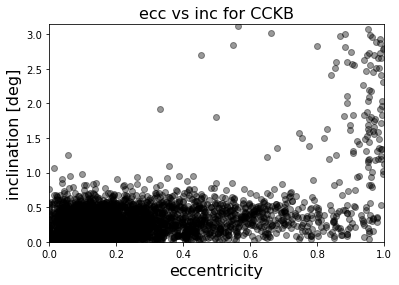

In [16]:
plt.plot(cckb['e'],cckb['i']*np.pi/180,ls='',marker='o',c='k',alpha=.4)
plt.ylabel('inclination [deg]',fontsize=16)
plt.xlabel('eccentricity',fontsize=16)
plt.title('ecc vs inc for CCKB',fontsize=16)
plt.xlim(0,1)
plt.ylim(0,np.pi)
plt.show()

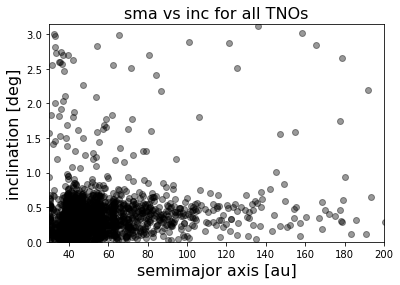

In [142]:
plt.plot(data['a'],data['i']*np.pi/180,ls='',marker='o',c='k',alpha=.4)
plt.xlabel('semimajor axis [au]',fontsize=16)
plt.ylabel('inclination [deg]',fontsize=16)
plt.title('sma vs inc for all TNOs',fontsize=16)
plt.xlim(30,200)
plt.ylim(0,np.pi)
plt.show()

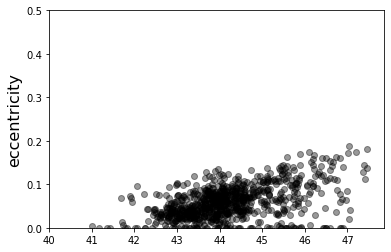

In [19]:
plt.plot(cckb['a'],cckb['e'],ls='',marker='o',c='k',alpha=.4)
plt.ylabel('semimajor axis [AU]',fontsize=16)
plt.ylabel('eccentricity',fontsize=16)
#plt.title('ecc vs inc for CCKB',fontsize=16)
plt.ylim(0,.5)
plt.xlim(40)
plt.show()

In [91]:
import seaborn as sns

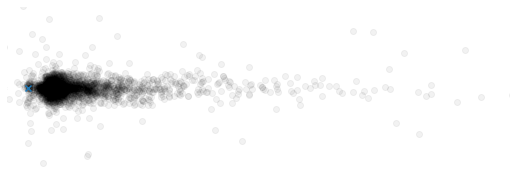

In [148]:
fig,ax=plt.subplots(figsize=(9,3))
plt.plot(data['a']*(1+np.random.normal(0,.2,len(data))*data['e']),
         data['i']*np.random.uniform(-1,1,len(data)),
         ls='',marker='o',c='k',markersize=6,alpha=.05)

#sns.kdeplot(x=data['a']*(1+np.random.normal(0,.2,len(data))*data['e']),
#            y=data['i']*np.random.uniform(-1,1,len(data)),
#            levels=10,clip=((20,200),(-150,150)),bw_adjust=.5)

plt.scatter(30,0,c='C0',marker='x',zorder=10)
plt.scatter([5.2,10,19],[0,0,0],marker='x',c='k',s=5)
plt.scatter(0,0,marker='x',c='k',s=50,zorder=10)
plt.xlim(20,260)
plt.ylim(-152,152)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
fig.savefig('solar_system.png',dpi=1000)

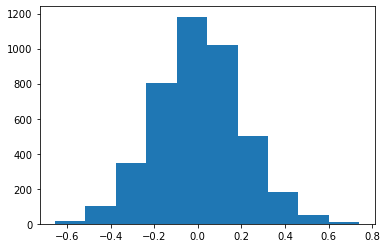

In [68]:
plt.hist(np.random.normal(0,.2,len(data)))
plt.show()